参考视频https://www.bilibili.com/video/BV17p4y1D7yX


# 基础测试模型训练和数据可视化

## 线性可分数据

In [35]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 这段代码就是在坐标轴上采样，最后通过查询模型的决策边界，来得到等高线图，用作后面可视化
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [23]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

In [24]:
X,y

(array([[ 1.41281595,  1.5303347 ],
        [ 1.81336135,  1.6311307 ],
        [ 1.43289271,  4.37679234],
        [ 1.87271752,  4.18069237],
        [ 2.09517785,  1.0791468 ],
        [ 2.73890793,  0.15676817],
        [ 3.18515794,  0.08900822],
        [ 2.06156753,  1.96918596],
        [ 2.03835818,  1.15466278],
        [-0.04749204,  5.47425256],
        [ 1.71444449,  5.02521524],
        [ 0.22459286,  4.77028154],
        [ 1.06923853,  4.53068484],
        [ 1.53278923,  0.55035386],
        [ 1.4949318 ,  3.85848832],
        [ 1.1641107 ,  3.79132988],
        [ 0.74387399,  4.12240568],
        [ 2.29667251,  0.48677761],
        [ 0.44359863,  3.11530945],
        [ 0.91433877,  4.55014643],
        [ 1.67467427,  0.68001896],
        [ 2.26908736,  1.32160756],
        [ 1.5108885 ,  0.9288309 ],
        [ 1.65179125,  0.68193176],
        [ 2.49272186,  0.97505341],
        [ 2.33812285,  3.43116792],
        [ 0.67047877,  4.04094275],
        [-0.55552381,  4.695

<function matplotlib.pyplot.show(close=None, block=None)>

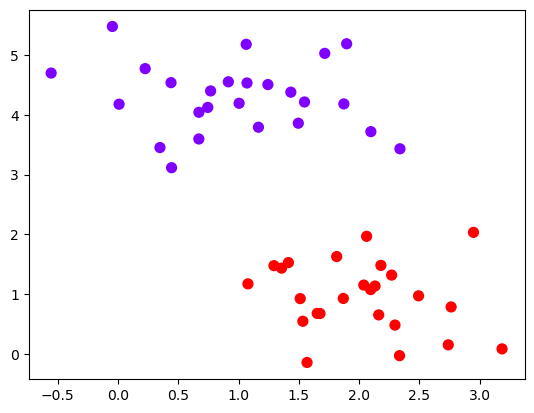

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show

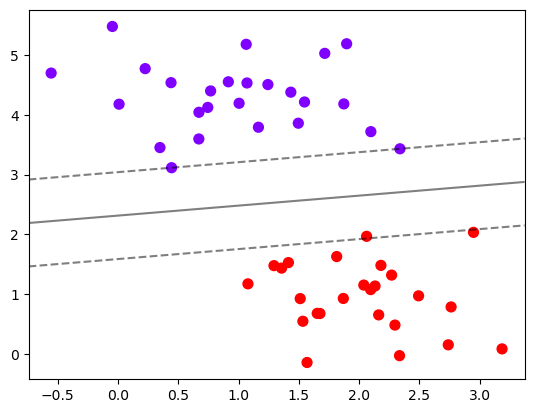

In [37]:
clf = SVC(kernel ='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

## 圆形数据

In [159]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.2)

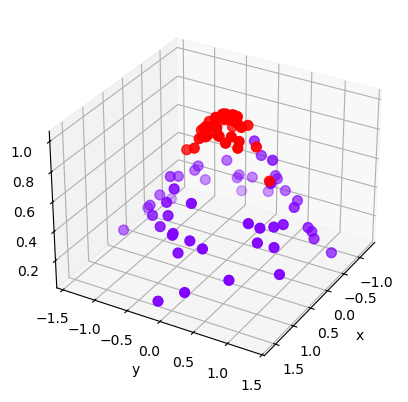

In [160]:
# r 其实是随便取了个东西来提升维度
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d

#定义一个绘制三维图像的的数
#eler表示上下旋转的角发中azim表示平行美转的角发
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

plot_3D()

In [161]:
from ipywidgets import interact,fixed
interact(plot_3D, elev=(0, 180),azim=(-180, 180), X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(IntSlider(value=30, description='elev', max=180), IntSlider(value=30, description='azim'…

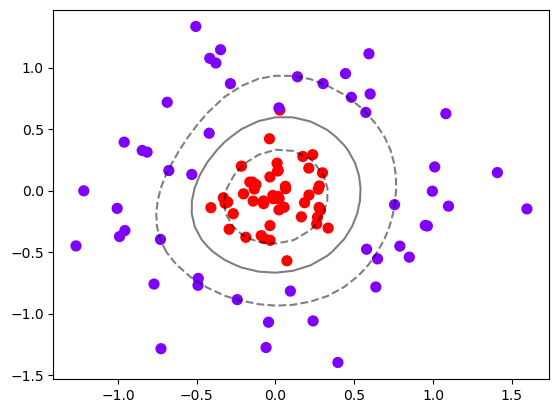

In [162]:
clf = SVC(kernel ='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

In [163]:
def plot_svc_decision_function_3D(model, X, y, elev=30,azim=30):
    plt.figure()
    ax = plt.subplot(projection="3d")
    # 这里的Z轴是根据决策边界来的，所以其实得改成rbf核函数的高维空间
    Z = model.decision_function(X)
    ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, s=50, cmap='rainbow', edgecolor='k')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 这段代码就是在坐标轴上采样，最后通过查询模型的决策边界，来得到等高线图，用作后面可视化
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    X_grid, Y_grid = np.meshgrid(x, y)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    Z_grid = model.decision_function(xy).reshape(X_grid.shape)
    
    ax.contour3D(X_grid, Y_grid, Z_grid, levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Decision Function")
    plt.show()

In [164]:
clf = SVC(kernel='rbf').fit(X, y)

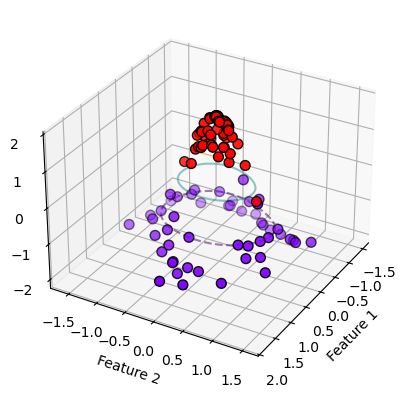

In [165]:
plot_svc_decision_function_3D(clf, X, y)

In [166]:
interact(
    plot_svc_decision_function_3D,
    elev=(0, 90, 10),          # 仰角范围 0~90，步长 10
    azim=(-180, 180, 10),       # 方位角范围 -180~180，步长 10
    model=fixed(clf),           # 固定模型
    X=fixed(X),                 # 固定数据 X
    y=fixed(y)                  # 固定标签 y
)
plt.show()

interactive(children=(IntSlider(value=30, description='elev', max=90, step=10), IntSlider(value=30, descriptio…

In [185]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)#将数据转化为0.1正态分布
X,y

(array([[-1.77906617e+00,  7.73036878e-01],
        [ 4.77303932e-01, -2.10735509e-01],
        [-1.86031459e+00, -2.24699317e-01],
        [-7.95538208e-01,  9.07865975e-01],
        [-9.20793004e-02,  2.48807541e-01],
        [-4.22632825e-01,  4.11332797e-01],
        [-1.51409880e+00,  6.23154280e-01],
        [ 4.58497917e-01, -3.59246923e-01],
        [ 3.59772765e-01, -2.41313925e-02],
        [-2.33688351e+00, -7.90301093e-01],
        [ 3.56274708e-03,  3.49648042e-01],
        [-1.64911336e-01, -1.54371895e-01],
        [-1.57071429e+00,  6.48021143e-01],
        [-9.10774800e-02, -4.84683777e-01],
        [ 1.36496510e-02, -8.18735352e-02],
        [-5.64055968e-01, -5.39512757e-01],
        [ 1.04691546e-01, -1.01441067e+00],
        [-9.50004160e-01,  2.51652685e+00],
        [ 1.05428729e+00,  2.10587352e+00],
        [ 7.93545055e-03, -8.00759223e-02],
        [-5.80614588e-01, -1.29750985e-01],
        [-2.92428639e-01,  1.69807299e-01],
        [-1.08375423e-01, -1.940

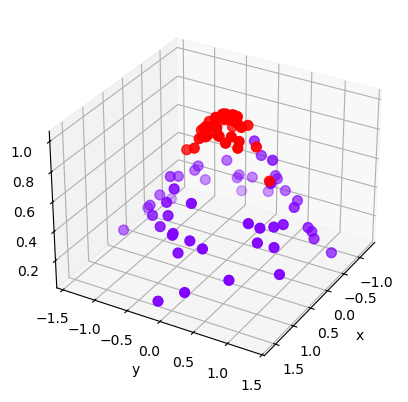

In [186]:
plot_3D()

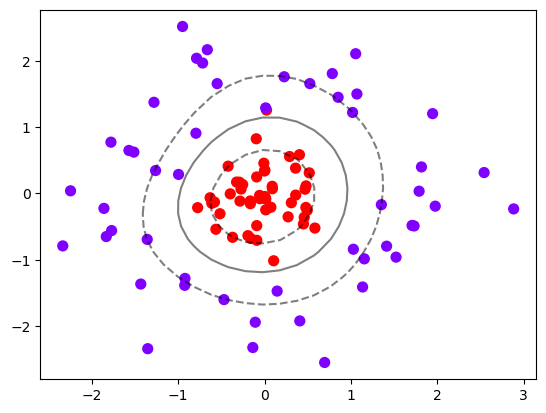

In [178]:
clf = SVC(kernel ='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

## 环形数据

In [28]:
def make_rings(
    n_samples_inner: int = 100,
    n_samples_outer: int = 100,
    n_samples_middle: int = 200,
    r_min: float = 1.0,
    r_max: float = 2.0,
    noise: float = 0.0,
    random_state: int = None
) -> tuple[np.ndarray, np.ndarray]:
    """
    生成同心环形数据集，适用于非线性分类任务（如SVM的RBF核）。

    Parameters
    ----------
    n_samples_inner : int, default=100
        内环区域（r < r_min）的样本数量
    n_samples_outer : int, default=100
        外环区域（r > r_max）的样本数量
    n_samples_middle : int, default=200
        中间环区域（r_min ≤ r ≤ r_max）的样本数量
    r_min : float, default=1.0
        中间环的内半径
    r_max : float, default=2.0
        中间环的外半径
    noise : float, default=0.0
        高斯噪声的标准差，控制数据点的扰动强度
    random_state : int, default=None
        随机种子，保证结果可复现

    Returns
    -------
    X : ndarray of shape (n_samples, 2)
        生成的特征矩阵，每行是二维坐标 (x, y)
    y : ndarray of shape (n_samples,)
        样本标签，0 表示内环/外环，1 表示中间环
    """
    rng = check_random_state(random_state)
    
    # 参数校验
    if r_min >= r_max:
        raise ValueError("r_min 必须小于 r_max")
    
    # 生成均匀分布在环形区域内的点（面积均匀）
    def generate_points(n, r_low, r_high):
        theta = rng.uniform(0, 2 * np.pi, n)  # 角度均匀分布
        r = rng.uniform(r_low, r_high, n)  # 半径平方均匀分布（保证面积均匀）
        # print('r:', r)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        # print('x:', x)
        # print('y:', y)
        return np.column_stack((x, y))
    # print('generate innder')
    # 生成内环（r < r_min）
    inner = generate_points(n_samples_inner, 0, r_min)
    # print('generate middle')
    # 生成中间环（r_min ≤ r ≤ r_max）
    middle = generate_points(n_samples_middle, r_min, r_max)
    # print('generate outer')
    # 生成外环（r > r_max），外环宽度与中间环一致
    outer_r_max = r_max + (r_max - r_min)  # 外环外半径为 r_max + Δr
    outer = generate_points(n_samples_outer, r_max, outer_r_max)
    
    # # 合并数据并添加标签
    # X = np.vstack([inner, middle, outer])
    # y = np.hstack([
    #     np.zeros(n_samples_inner + n_samples_outer),
    #     np.ones(n_samples_middle)
    # ])
    # 合并数据并添加标签
    X = np.vstack([inner, outer, middle])
    y = np.hstack([
        np.zeros(n_samples_inner + n_samples_outer),
        np.ones(n_samples_middle)
    ])
    # 添加高斯噪声
    if noise > 0:
        X += rng.normal(scale=noise, size=X.shape)
    
    # 打乱数据顺序
    indices = rng.permutation(X.shape[0])
    return X[indices], y[indices]

In [29]:
X, y

(array([[-0.86014013, -2.43852298],
        [ 0.48568632,  0.10660617],
        [-0.08456332,  0.62662565],
        [-2.0659312 , -0.14748123],
        [ 1.46091798,  0.85336278],
        [ 0.98387677, -0.72857522],
        [-0.71856289, -0.10333935],
        [ 0.92752503,  1.88164967],
        [ 2.00057755, -0.42539154],
        [-2.75746755, -0.04569361],
        [ 0.57473727,  0.40486137],
        [-2.84640828, -0.56813139],
        [-0.62599485,  2.67843461],
        [-0.3514655 , -2.01023532],
        [-1.66785441,  1.77253929],
        [ 0.22248659, -0.2585072 ],
        [ 0.57338295,  0.68863024],
        [ 1.07936688,  2.06340633],
        [-0.27295359,  2.07339729],
        [ 1.86962291, -1.10784319],
        [-0.59010866,  0.72748529],
        [ 0.60613881, -0.19394317],
        [ 1.04488937, -2.12947787],
        [-0.90314821, -1.49484298],
        [-0.58675364, -0.23777642],
        [ 1.56594927,  1.89494331],
        [-0.80573144,  0.3944663 ],
        [ 0.26310087,  0.576

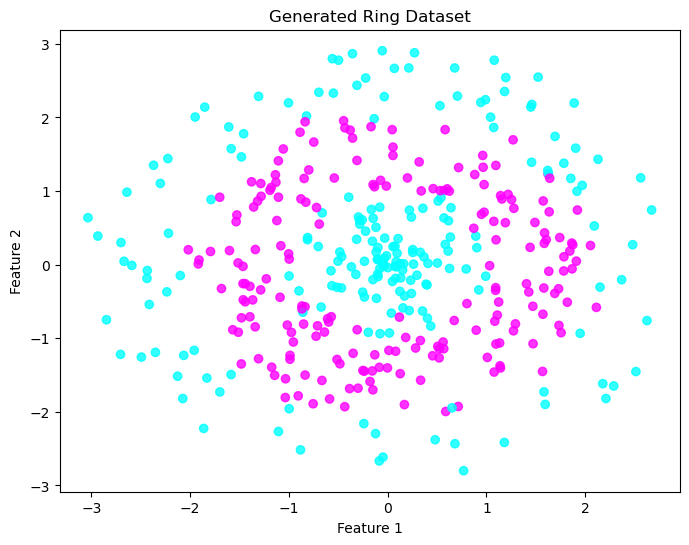

In [32]:
import matplotlib.pyplot as plt

# 生成数据集
X, y = make_rings(
    n_samples_inner=100,
    n_samples_outer=100,
    n_samples_middle=200,
    r_min=1.0,
    r_max=2.0,
    noise=0.1,
    random_state=42
)

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool', alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Ring Dataset")
plt.show()